# Data Preprocessing
Breast cancer data used. What's most important is that **if train data was preprocessed for model fitting, test data should be also preprocessed for prediction.**

### Load Data

In [7]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [8]:
# Load dataset
bc = load_breast_cancer()
type(bc), bc                   # Bunch object

(sklearn.utils.Bunch,
 {'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
          1.189e-01],
         [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
          8.902e-02],
         [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
          8.758e-02],
         ...,
         [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
          7.820e-02],
         [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
          1.240e-01],
         [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
          7.039e-02]]),
  'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
         1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
         1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
         1, 1, 1,

In [9]:
# Set x, y
x = bc.data
y = bc.target
x.shape, y.shape

((569, 30), (569,))

In [10]:
df = pd.DataFrame(x)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
pd.DataFrame(y).head()

,0
0,0
1,0
2,0
3,0
4,0


In [12]:
# Distribution plotting to visualize
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = df.iloc[:, 22]
data.head()

0    184.60
1    158.80
2    152.50
3     98.87
4    152.20
Name: 22, dtype: float64

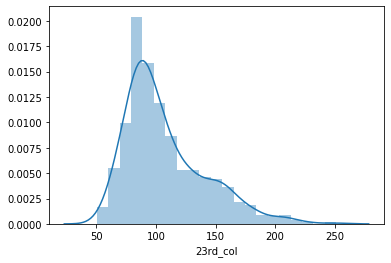

In [14]:
# Plot data before standardiziation
# Input data should be 1D array
sns.distplot(data, axlabel='23rd_col')

### Split Data
**Splitting data should be done after standardization on the job** which is the next step. Here, it is done before to see what happens when test data is not standardized for prediction.

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=5)
x_train.shape, y_test.shape

((483, 30), (86,))

### Standardization - Preprocessing Step

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
# Create scaler object
scaler = StandardScaler()

In [18]:
# Fit & transform "x_train" data - can be done at once by fit_transform()
scaler.fit(x_train)                            # Get mean & standard deviation of each column
x_train_t = scaler.transform(x_train)          # Perform standardization
x_train_t

array([[ 1.47622369, -0.13203122,  1.41763676, ...,  1.47582537,
         1.01857964, -0.05243044],
       [-1.69515898,  0.36557803, -1.61299365, ..., -0.53111345,
         0.67375681,  3.54873819],
       [-0.08191173,  1.07811709, -0.00641967, ...,  1.35569551,
         2.4540049 ,  1.35491021],
       ...,
       [ 1.10111701,  0.44033623,  1.3714829 , ...,  1.28022931,
         0.55026212,  1.96918204],
       [ 0.48651915,  0.88187682,  0.58686725, ...,  1.38803816,
         0.59677311,  2.26534882],
       [-1.21704224, -0.43573639, -1.2080984 , ..., -0.88395642,
         0.13968238, -0.55372014]])

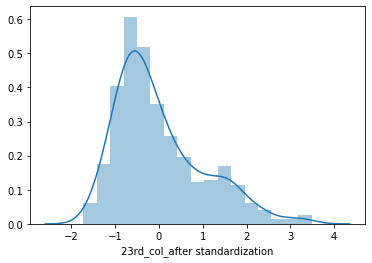

In [19]:
# Plot data after standardization
df2 = pd.DataFrame(x_train_t)
sns.distplot(df2.iloc[:, 22], axlabel='23rd_col_after standardization')

### Logistic Regression
Target value is 'malignant' or benign'. It has **binary class** of the category.

In [20]:
# Create model object
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(solver='newton-cg')

To see how the score changes, I will try several different cases with untransformed and transformed data. <br>
#### 1) Fit with untransformed train data & Predict untransfored train data

In [21]:
# Fit model 
logi.fit(x_train, y_train)
logi.classes_, logi.coef_, logi.intercept_

(array([0, 1]),
 array([[ 0.87760113,  0.19311463, -0.32945302,  0.0257606 , -0.16369568,
         -0.20656024, -0.49908735, -0.26724573, -0.25612174, -0.02831329,
         -0.04762646,  1.45630108,  0.10908966, -0.10390196, -0.02647736,
          0.05851127, -0.03716508, -0.03287373, -0.04078685,  0.01323775,
         -0.00178078, -0.45176192, -0.10898359, -0.0107303 , -0.34384812,
         -0.57879696, -1.2895823 , -0.52895258, -0.74231851, -0.09037023]]),
 array([33.09588923]))

In [22]:
# Predict data
pd.DataFrame(logi.predict(x_train), columns=['Category']).head()

,Category
0,0
1,1
2,0
3,0
4,0


In [23]:
# Compare with actual data
pd.DataFrame(y_train, columns=['Category']).head()

,Category
0,0
1,1
2,0
3,0
4,0


In [24]:
# Get score - Mean accuracy
logi.score(x_train, y_train)

0.9565217391304348

In [25]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, r2_score

# 1. Classification report
cr = classification_report(y_train, logi.predict(x_train))
print('Report: ', cr)

# 2. Confusion_matrix
cm = confusion_matrix(y_train, logi.predict(x_train))
print('Matrix: ', cm)

# 3. R2
r2 = r2_score(y_train, logi.predict(x_train))
print('R-squared: ', r2)

Report:                precision    recall  f1-score   support

           0       0.95      0.93      0.94       179
           1       0.96      0.97      0.97       304

    accuracy                           0.96       483
   macro avg       0.95      0.95      0.95       483
weighted avg       0.96      0.96      0.96       483

Matrix:  [[167  12]
 [  9 295]]
R-squared:  0.813602616877389


#### 2) Fit with transformed train data & Predict transfored train data

In [26]:
# Fit model
logi.fit(x_train_t, y_train)

LogisticRegression(solver='newton-cg')

In [27]:
# Predict data
pd.DataFrame(logi.predict(x_train_t)).head()

,0
0,0
1,1
2,0
3,0
4,0


In [28]:
# Get score
logi.score(x_train_t, y_train)

0.9917184265010351

In [29]:
# Model Evaluation
# 1. Classification report
cr = classification_report(y_train, logi.predict(x_train_t))
print('Report: ', cr)

# 2. Confusion_matrix
cm = confusion_matrix(y_train, logi.predict(x_train_t))
print('Matrix: ', cm)

# 3. R2
r2 = r2_score(y_train, logi.predict(x_train_t))
print('R-squared: ', r2)

Report:                precision    recall  f1-score   support

           0       0.99      0.98      0.99       179
           1       0.99      1.00      0.99       304

    accuracy                           0.99       483
   macro avg       0.99      0.99      0.99       483
weighted avg       0.99      0.99      0.99       483

Matrix:  [[176   3]
 [  1 303]]
R-squared:  0.9644957365480741


> The outcome of 1) with untransfored data was big enough, but the score with transformed data got much better.

#### 3) Fit with transformed train data & Predict untransfored test data
This could happend often on the job.

In [30]:
# Fit model
logi.fit(x_train_t, y_train)

LogisticRegression(solver='newton-cg')

In [31]:
# Predict data
logi.predict(x_test)[:5]

array([0, 0, 0, 0, 0])

In [32]:
# Compare with actual data
y_test[:5]             # Big difference from prediction

array([0, 1, 1, 1, 1])

In [33]:
# Get score
logi.score(x_test, y_test)

0.38372093023255816

In [34]:
# Model Evaluation
# 1. Classification report
cr = classification_report(y_test, logi.predict(x_test))
print('Report: ', cr)

# 2. Confusion_matrix
cm = confusion_matrix(y_test, logi.predict(x_test))
print('Matrix: ', cm)

# 3. R2
r2 = r2_score(y_test, logi.predict(x_test))
print('R-squared: ', r2)

Report:                precision    recall  f1-score   support

           0       0.38      1.00      0.55        33
           1       0.00      0.00      0.00        53

    accuracy                           0.38        86
   macro avg       0.19      0.50      0.28        86
weighted avg       0.15      0.38      0.21        86

Matrix:  [[33  0]
 [53  0]]
R-squared:  -1.606060606060606


C:\Users\sori-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sori-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sori-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> R-squared is very low compared to the previous outcomes.

#### 4) Fit with transformed train data & Predict transfored test data

In [37]:
# Get transformed x_test data by fitting model with itself
scaler2 = StandardScaler()
x_test_t = scaler2.fit_transform(x_test)
x_test_t

array([[ 2.58472063e-01,  1.19228003e+00,  3.38213328e-01, ...,
         1.16005338e+00,  1.92975390e+00,  8.57441644e-01],
       [-5.18210324e-01,  4.81017431e-01, -5.09856374e-01, ...,
        -5.79790727e-01, -1.06698772e+00,  3.89022798e-01],
       [ 4.85579046e-02, -2.16114822e+00,  3.28330187e-02, ...,
         2.53598088e-04, -9.01356108e-03, -2.45761431e-01],
       ...,
       [ 4.84129784e-01,  3.22440852e-01,  4.81125296e-01, ...,
         1.31687945e-01,  9.97850736e-01, -4.74071373e-01],
       [-1.58732327e-01,  1.56868247e-01, -1.20609304e-01, ...,
         4.84105313e-01,  5.14010702e-01,  1.82141695e+00],
       [-5.41825667e-01, -5.17082214e-01, -5.69277666e-01, ...,
        -5.77335360e-01,  3.72606748e-01, -1.71427962e-01]])

In [43]:
# Fit model
logi.fit(x_train_t, y_train)

LogisticRegression(solver='newton-cg')

In [44]:
# Predict data
logi.predict(x_test_t)[:5]        # Looks better than untransformated test data

array([0, 1, 1, 1, 1])

In [45]:
# Get score
logi.score(x_test_t, y_test)

0.9651162790697675

In [46]:
# Model Evaluation
# 1. Classification report
cr = classification_report(y_test, logi.predict(x_test_t))
print('Report: ', cr)

# 2. Confusion_matrix
cm = confusion_matrix(y_test, logi.predict(x_test_t))
print('Matrix: ', cm)

# 3. R2
r2 = r2_score(y_test, logi.predict(x_test_t))
print('R-squared: ', r2)

Report:                precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.95      1.00      0.97        53

    accuracy                           0.97        86
   macro avg       0.97      0.95      0.96        86
weighted avg       0.97      0.97      0.96        86

Matrix:  [[30  3]
 [ 0 53]]
R-squared:  0.8524871355060034


> R-squared got much better. Thus, **using transformated data for both fitting & prediction steps enables more accuarate prediction.**

## Extra) Standardization of Test Data
When transforming data, is it different if using already x_train fitted model or newly x_test fitted model? StandandScaler().fit() finds the mean and std of given data, but can it be used for unseen data? Let's test it out.

In [37]:
# 1. Get transformed x_test data by fitting model with itself
scaler2 = StandardScaler()
x_test_t = scaler2.fit_transform(x_test)
x_test_t

array([[ 2.58472063e-01,  1.19228003e+00,  3.38213328e-01, ...,
         1.16005338e+00,  1.92975390e+00,  8.57441644e-01],
       [-5.18210324e-01,  4.81017431e-01, -5.09856374e-01, ...,
        -5.79790727e-01, -1.06698772e+00,  3.89022798e-01],
       [ 4.85579046e-02, -2.16114822e+00,  3.28330187e-02, ...,
         2.53598088e-04, -9.01356108e-03, -2.45761431e-01],
       ...,
       [ 4.84129784e-01,  3.22440852e-01,  4.81125296e-01, ...,
         1.31687945e-01,  9.97850736e-01, -4.74071373e-01],
       [-1.58732327e-01,  1.56868247e-01, -1.20609304e-01, ...,
         4.84105313e-01,  5.14010702e-01,  1.82141695e+00],
       [-5.41825667e-01, -5.17082214e-01, -5.69277666e-01, ...,
        -5.77335360e-01,  3.72606748e-01, -1.71427962e-01]])

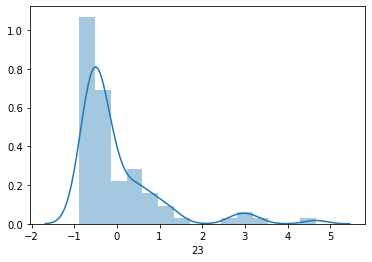

In [38]:
df3 = pd.DataFrame(x_test_t)
sns.distplot(df3.iloc[:, 23])

In [39]:
# 2. Use alredy x_train fitted model
x_test_tt = scaler.transform(x_test)
x_test_tt

array([[ 0.34801823,  1.43321852,  0.44840566, ...,  1.3726369 ,
         1.80445492,  0.81522852],
       [-0.50607082,  0.72067946, -0.49774851, ..., -0.48259946,
        -1.01667696,  0.37975367],
       [ 0.11718335, -1.92622794,  0.10770624, ...,  0.13591533,
        -0.02070033, -0.21038606],
       ...,
       [ 0.59616572,  0.5618183 ,  0.60784628, ...,  0.27606684,
         0.92716149, -0.42263892],
       [-0.11076609,  0.39594855, -0.06348263, ...,  0.6518577 ,
         0.47167459,  1.71140726],
       [-0.53203974, -0.27921142, -0.56404224, ..., -0.47998125,
         0.33855694, -0.14128048]])

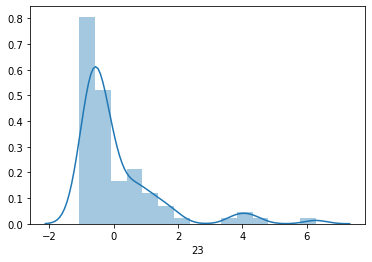

In [40]:
df4 = pd.DataFrame(x_test_tt)
sns.distplot(df4.iloc[:, 23])

It definitely looks different. Then **what is the correct standardization?** As mentioned before, standardization should have been done before splitting train & test data. Let's standardize the whole untransformed data and compare.

In [41]:
scaler3 = StandardScaler()
x_t = scaler3.fit_transform(x)

In [53]:
# Test dataset starts from index=483
df5 = pd.DataFrame(x_t)
df6 = df5.iloc[483:]
df6

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
483,-0.121357,-0.383884,-0.173371,-0.238305,0.223439,-0.469447,-0.543873,-0.446730,-0.290683,-0.271841,...,-0.271110,-0.349662,-0.341978,-0.341181,-0.546572,-0.761237,-0.470102,-0.362945,-0.619215,-0.794985
484,0.455192,-1.863899,0.446130,0.262542,0.565034,0.484381,0.380424,0.340245,-0.100834,-0.029431,...,0.153409,-1.868995,0.156042,-0.046203,0.952616,0.277579,0.615098,0.465839,-0.556121,-0.118358
485,-0.476375,-0.670114,-0.375615,-0.506788,-0.086842,0.886153,0.823615,-0.011843,0.987147,1.481735,...,-0.515468,-0.756771,-0.281214,-0.527344,-0.651778,0.965882,1.043037,0.298347,0.534263,1.078069
486,0.145616,-0.567723,0.092306,0.031601,-0.708116,-0.708046,-0.463019,-0.541910,-1.469938,-1.310945,...,0.039513,-0.038630,-0.037566,-0.087163,-0.796437,-0.300672,-0.136674,-0.553125,-0.721135,-0.996699
487,1.508885,-0.109290,1.488242,1.456496,0.892395,0.766758,1.717529,1.817982,0.041553,-0.233566,...,1.592632,0.767446,1.389175,1.510780,0.834259,0.752140,1.541979,1.391616,0.590885,0.340485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


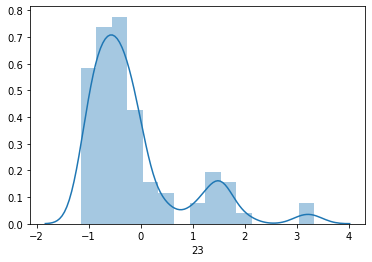

In [54]:
# Plot the transformed test data
sns.distplot(df6.iloc[:, 23])

As you can see the final outcome is totally different from both. I had a long way up to here just to test what it's like, but it can be expected from the start that those are not same, as **the mean and std for each case are not same. This is why standardization should be done before splitting, and the final result is the right way among above.**